<div style="text-align:left;">
  <a href="https://code213.tech/" target="_blank">
    <img src="../images/code213.PNG" alt="QWorld">
  </a>
  <p><em>prepared by Latreche Sara</em></p>
</div>

#  Clustering: Finding Structure in Unlabeled Data


**History in Brief**

- 1957: Stuart Lloyd developed it at Bell Labs for signal compression.

- 1965: Edward W. Forgy independently described the same method.

Today, it is called the Lloyd–Forgy algorithm.


    Imagine you're exploring a forest trail and you suddenly stumble upon a strange new plant. Curious, you look around and notice a few more plants with similar shapes, colors, or sizes. Even though they’re not identical, you can tell they likely belong to the same species—or at least the same family. You don’t need a botanist to group them; your eyes and brain are already doing a kind of unsupervised learning. 

This is the essence of **clustering**: grouping similar items together based on patterns in the data.

---

##  What is Clustering?

Clustering is an **unsupervised learning** technique used to find natural groupings in a dataset. Each group is called a **cluster**, and the goal is to ensure that instances within the same cluster are more similar to each other than to those in other clusters.

Unlike classification, where the model learns from **labeled data**, clustering works with **unlabeled data**—you don’t tell the model what the groups are; it discovers them on its own.

---

##  Classification vs. Clustering

Let’s revisit a classic dataset: the **Iris dataset**, which includes measurements of different iris flowers.

- In **classification**, we use labels like `setosa`, `versicolor`, and `virginica` to train a model to recognize those species.  
- In **clustering**, we remove those labels and ask the algorithm to discover the groupings purely from the measurements.

Some clustering algorithms—like **K-Means** or **Gaussian Mixture Models**—do surprisingly well and can recover the natural groupings with high accuracy.

---

## Why Use Clustering?

Clustering has many practical applications:

###  Customer Segmentation  
Group customers based on their behavior, preferences, or purchase history. This helps tailor marketing strategies or product recommendations for each group.

###  Exploratory Data Analysis  
When faced with a new dataset, clustering can reveal hidden structures, outliers, or relationships, making it easier to understand and visualize the data.

###  Dimensionality Reduction  
After clustering, we can represent each instance by its similarity (or **affinity**) to each cluster. This reduces the feature space while keeping meaningful structure.

###  Anomaly Detection  
If an instance doesn’t belong clearly to any cluster, it might be an outlier—useful for fraud detection or spotting defects in manufacturing.

### Semi-Supervised Learning  
Have very few labels? Cluster your data and spread known labels across similar instances within each cluster to boost your labeled dataset.

###  Image & Web Search  
To find visually similar images, cluster your image dataset based on visual features. Then, when a new image is input, you can return others from the same cluster.

###  Image Segmentation  
Cluster pixels by color to simplify and stylize images. This is often a first step in object detection or tracking.

---

### Not All Clusters Look the Same

There’s no universal definition of a "cluster." It depends on the context and the algorithm:

- **Centroid-based** algorithms (like K-Means) look for clusters around central points.
- **Density-based** algorithms (like DBSCAN) find dense regions of points, regardless of shape.
- **Hierarchical** algorithms build nested clusters step-by-step.

Choosing the right clustering approach depends on your data and your goals.

---

In the next sections, we’ll explore some of the most popular clustering algorithms, visualize their behavior, and apply them to real datasets. Let’s get started! 


#  K-Means Clustering: Algorithm

## Objective

https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

K-Means aims to minimize the **within-cluster sum of squares (WCSS)**, or **inertia**:

$$
\min_{\mu_1, \dots, \mu_k} \sum_{i=1}^{n} \| x_i - \mu_{c(i)} \|^2
$$

Where:

- $x_i$ is the $i$-th data point  
- $c(i)$ is the index of the closest centroid to $x_i$  
- $\mu_{c(i)}$ is the centroid of the cluster assigned to $x_i$


##  Algorithm Steps

### Step 1: Initialization

Randomly choose $( k )$ centroids:

$$
\mu_1^{(0)}, \mu_2^{(0)}, \dots, \mu_k^{(0)}
$$



### Step 2: Assignment (E-Step)

Assign each point to the nearest centroid:

$$
c_i = \arg\min_{j \in \{1, \dots, k\}} \| x_i - \mu_j \|^2
$$



### Step 3: Update (M-Step)

Recompute centroids as the mean of assigned points:

$$
\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i
$$

Where:

- $C_j$ is the set of points assigned to cluster $j$  
- $|C_j|$ is the number of points in cluster $j$



### Step 4: Repeat Until Convergence

Repeat Steps 2 and 3 until convergence:

- No change in assignments, or  
- Centroids stop moving, or  
- Maximum iterations reached



##  Convergence

The algorithm converges to a **local minimum** of the cost function:

$$
J = \sum_{j=1}^{k} \sum_{x_i \in C_j} \| x_i - \mu_j \|^2
$$

>  Note: Convergence depends on the initial choice of centroids.



##  Summary Table

| Step               | Formula                                                  | Purpose                         |
|--------------------|-----------------------------------------------------------|----------------------------------|
| Initialization     | $$\mu_1, ..., \mu_k \sim \text{Random}$$                 | Random starting centroids       |
| Assignment (E-step)| $$c_i = \arg\min_j \| x_i - \mu_j \|^2$$                 | Assign data to nearest centroid |
| Update (M-step)    | $$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$       | Recalculate cluster centers     |
| Objective Function | $$\sum \| x_i - \mu_{c(i)} \|^2$$                        | Minimize within-cluster spread  |





In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


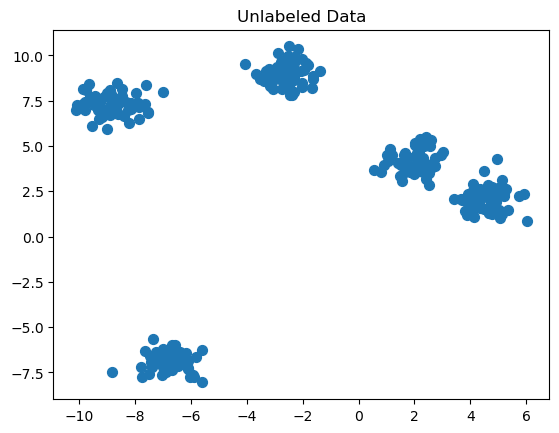

In [4]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Unlabeled Data")
plt.show()


In [28]:
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def init_centroids(X, k):
    idx = np.random.choice(len(X), k, replace=False)
    return X[idx]

def assign_clusters(X, centroids):
    return np.array([np.argmin([euclidean(x, c) for c in centroids]) for x in X])

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=800, tol=1e-4):
    centroids = init_centroids(X, k) # first step 
    for _ in range(max_iters):
        old_centroids = centroids
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        # check for convergence
        if np.all(np.abs(centroids - old_centroids) < tol):
            break
    return centroids, labels


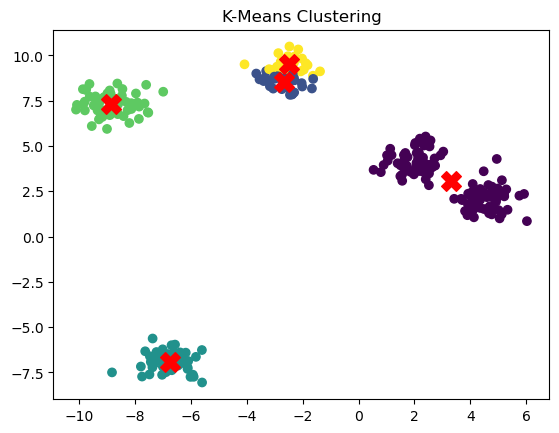

In [30]:
k = 5
final_centroids, final_labels = kmeans(X, k)

plt.scatter(X[:, 0], X[:, 1], c=final_labels, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.show()


# Intuition Behind the Elbow Method
When using K-Means, the goal is to minimize the Within-Cluster Sum of Squares (WCSS) — the total distance between data points and their assigned cluster centers.

As k increases, WCSS decreases because clusters become smaller and tighter.

However, beyond a certain point, adding more clusters yields diminishing returns.

The "elbow" in the curve (plot of k vs. WCSS) indicates the optimal number of clusters — the point after which WCSS decreases more slowly.

Let:

$$
WCSS(k) = \sum_{j=1}^{k} \sum_{x_i \in C_j} \| x_i - \mu_j \|^2
$$

Plotting $( WCSS )$ as a function of $ k $ and looking for the inflection point (the elbow) gives a good choice for the number of clusters.



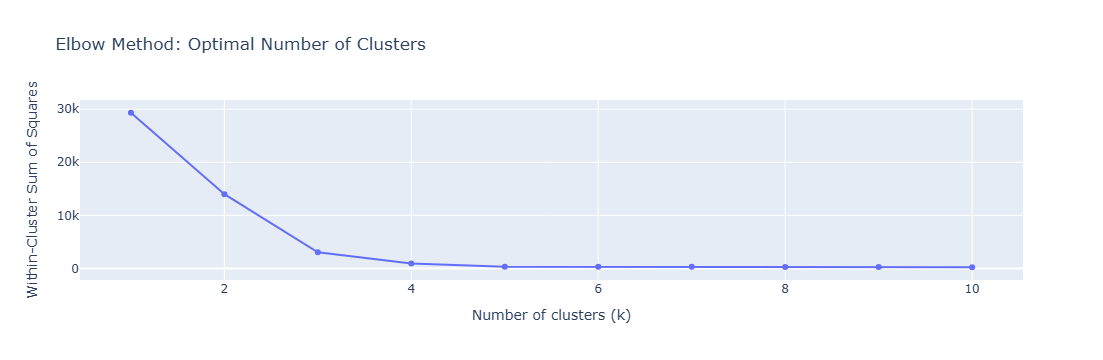

In [33]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate dataset
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.60, random_state=42)

# Try different values of k and compute inertia (WCSS)
inertias = []
k_range = range(1, 11)
all_centroids = []
all_labels = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
    all_centroids.append(kmeans.cluster_centers_)
    all_labels.append(kmeans.labels_)

# Plot elbow curve
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=list(k_range), y=inertias, mode='lines+markers', name='WCSS'))
fig1.update_layout(title='Elbow Method: Optimal Number of Clusters',
                   xaxis_title='Number of clusters (k)', yaxis_title='Within-Cluster Sum of Squares')
fig1.show()


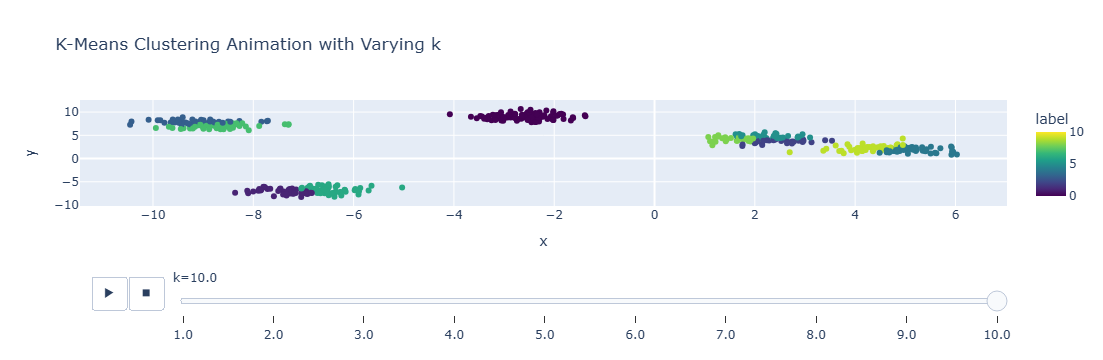

In [35]:
import plotly.express as px
import pandas as pd

frames = []

for k, centroids, labels in zip(k_range, all_centroids, all_labels):
    df = pd.DataFrame(X, columns=['x', 'y'])
    df['label'] = labels
    df['k'] = k
    cent_df = pd.DataFrame(centroids, columns=['x', 'y'])
    cent_df['label'] = -1  # Use -1 for centroid marker
    df = pd.concat([df, cent_df])
    frames.append(df)

final_df = pd.concat(frames)

fig2 = px.scatter(final_df, x='x', y='y', color='label', animation_frame='k',
                  title='K-Means Clustering Animation with Varying k',
                  color_continuous_scale='Viridis', range_color=[0, 10])
fig2.update_traces(marker=dict(size=6, line=dict(width=0)))
fig2.show()


### Silhouette Score Method for Choosing k

Intuition
The Silhouette Score measures how similar an instance is to its own cluster compared to other clusters.

It ranges from 
−1 to +1:

+1: Instance is well matched to its own cluster and poorly matched to neighboring clusters.

0: Instance is on or very close to the decision boundary between two clusters.

-1: Instance might be assigned to the wrong cluster.

Average silhouette score over all points gives a global measure of clustering quality.

The best k maximizes the average silhouette score.

 ### Mathematical Definition

For each data point $ i $:

- $ a(i) $: average distance between $ i $ and all other points in the same cluster (cohesion).

- $ b(i) $: minimum average distance between $ i $ and points in other clusters (separation).

Silhouette coefficient for $ i $:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

The average silhouette score for all points is:

$$
S = \frac{1}{n} \sum_{i=1}^n s(i)
$$



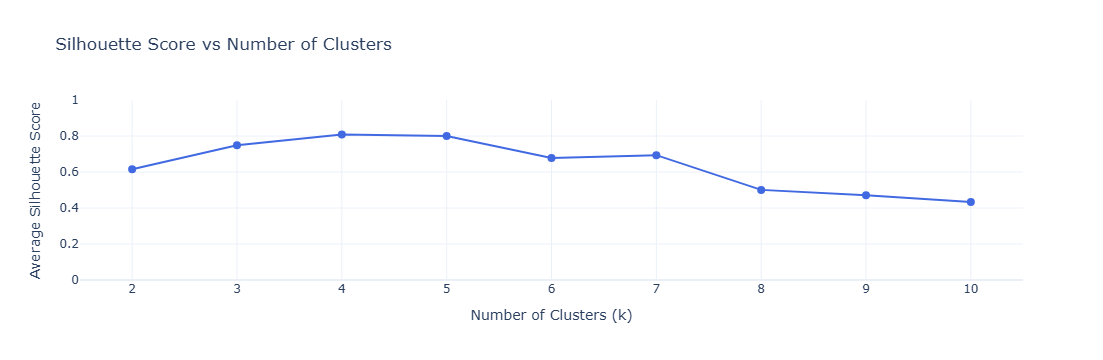

In [50]:
import numpy as np
import plotly.graph_objs as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=5, cluster_std=0.6, random_state=42)

silhouette_avgs = []
k_values = list(range(2, 11))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42,n_init='auto').fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# Create Plotly line plot for average silhouette scores
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=k_values,
    y=silhouette_avgs,
    mode='lines+markers',
    name='Average Silhouette Score',
    line=dict(color='royalblue', width=2),
    marker=dict(size=8)
))

fig.update_layout(
    title='Silhouette Score vs Number of Clusters',
    xaxis_title='Number of Clusters (k)',
    yaxis_title='Average Silhouette Score',
    yaxis=dict(range=[0, 1]),
    template='plotly_white'
)

fig.show()


**Interpretation**

- The k with the highest average silhouette score is usually the best choice.

- It balances tight clusters and well-separated clusters.

Unlike the elbow method, it gives a direct quantitative score of cluster quality.